In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
L = 0.01 #length in [m]
nx, ny = 21,21
dx = L / (nx - 1)
dy = L / (ny - 1)

x = np.linspace(0.0, L, num=nx)
y = np.linspace(0.0, L, num=ny)

alpha = 1e-4

#Initial conditions
T0 = np.full((ny,nx), 20.0)
T0[0,:] = 100.0 #bottom boundary
T0[:,0] = 100.0 #left boundary

In [8]:
def ftcs(T0, nt, dt, dx, dy, alpha, qx=0.0, qy=0.0):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    I, J = nx // 2, ny // 2
    
    for n in range(nt):
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] + sigma_x *(T[1:-1,:-2] - 2 * T[1:-1, 1:-1] + T[1:-1, 2:])
                         + sigma_y * (T[:-2, 1:-1] - 2*T[1:-1,1:-1] + T[2:, 1:-1]))
        #Update boundary values (Neumann condition)
        T[:,-1] = T[:,-2] + qx * dx #right boundary
        T[-1,:] = T[-2,:] + qy * dy #left boundary
        if T[J,I] >= 70.0:
            break
    print("TEMP:  ", T[J,I], "  AT TIME-STEP:  ", n+1)
    return T

In [9]:
nt = 500
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha

T = ftcs(T0, nt, dt, dx, dy, alpha)

TEMP:   70.02138294076661   AT TIME-STEP:   256


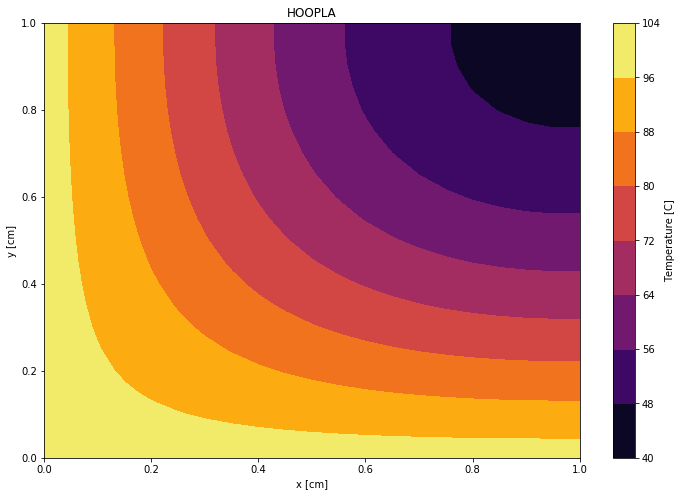

In [18]:
plt.figure(figsize=[12,8])
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('HOOPLA')
contf = plt.contourf(x*100, y*100, T, cmap='inferno');
cbar = plt.colorbar(contf)
cbar.set_label('Temperature [C]')